# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Davin Ghani Ananta Kusuma
- **Email:** anantadavin4@gmail.com
- **ID Dicoding:** davin_ghani

## Menentukan Pertanyaan Bisnis

- Bagaimana perbedaan pola penyewaan sepeda antara pengguna casual dan registered?
- Bagaimana dampak hari kerja dan libur terhadap jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"davinghani","key":"605f21ba601be3b61417fd1bebcc714c"}'}

In [3]:
import os
import zipfile

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d lakshmi25npathi/bike-sharing-dataset

Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset
License(s): unknown
bike-sharing-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
!unzip bike-sharing-dataset.zip

Archive:  bike-sharing-dataset.zip
replace Readme.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Readme.txt              
replace day.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: day.csv                 
replace hour.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: hour.csv                


In [6]:
day_df = pd.read_csv("day.csv")
hour_df = pd.read_csv("hour.csv")

# check beberapa baris pertama
print(day_df.head())
print(hour_df.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
   instant      dteday  se

**Insight:**
- day.csv = Data penyewaan per hari
- hour.csv = Data penyewaan per jam

### Assessing Data

In [7]:
# Mengecek jumlah baris & kolom
print("Shape of day_df:", day_df.shape)
print("Shape of hour_df:", hour_df.shape)

Shape of day_df: (731, 16)
Shape of hour_df: (17379, 17)


In [8]:
# Mengecek tipe data
print("Info Dataset Harian:")
print(day_df.info())

Info Dataset Harian:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


In [9]:
#Mengecek tipe data
print("Info Dataset Per Jam:")
print(hour_df.info())

Info Dataset Per Jam:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


In [10]:
#Melihat pola data
print("Preview day_df:")
print(day_df.head())

Preview day_df:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [11]:
print("Preview hour_df:")
print(hour_df.head())

Preview hour_df:
   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


In [12]:
# Mengecek missing values di data harian
print("Missing values in day_df:")
print(day_df.isnull().sum())

Missing values in day_df:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [13]:
# Mengecek missing values di data per jam
print("Missing values in hour_df:")
print(hour_df.isnull().sum())

Missing values in hour_df:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [14]:
# Cek jumlah duplikasi di data harian
print("Jumlah duplikasi di day_df:", day_df.duplicated().sum())

Jumlah duplikasi di day_df: 0


In [15]:
# Cek jumlah duplikasi di data per jam
print("Jumlah duplikasi di hour_df:", hour_df.duplicated().sum())

Jumlah duplikasi di hour_df: 0


**Insight:**
- Data bersih secara struktur, tidak ada missing values & duplikasi
- Beberapa kolom sudah dikonversi ke format yang benar

### Cleaning Data

Menghapus Kolom yang Tidak Relevan

In [16]:
#* Hapus kolom yang tidak diperlukan
day_df.drop(columns=['instant', 'atemp'], inplace=True)
hour_df.drop(columns=['instant', 'atemp'], inplace=True)

In [17]:
# Cek kolom sudah terhapus
print(day_df.columns)
print(hour_df.columns)

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'casual', 'registered',
       'cnt'],
      dtype='object')
Index(['dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')


Menyesuaikan Kategori pada Kolom yang Berbentuk Angka

In [18]:
# Mapping label kategori
season_mapping = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
weather_mapping = {1: "Clear", 2: "Cloudy", 3: "Light Rain/Snow", 4: "Heavy Rain/Snow"}

In [19]:
# Mengubah angka menjadi kategori
day_df["season"] = day_df["season"].map(season_mapping)
hour_df["season"] = hour_df["season"].map(season_mapping)

day_df["weathersit"] = day_df["weathersit"].map(weather_mapping)
hour_df["weathersit"] = hour_df["weathersit"].map(weather_mapping)

In [20]:
# Cek perubahan
print(day_df[['season', 'weathersit']].head())
print(hour_df[['season', 'weathersit']].head())

   season weathersit
0  Spring     Cloudy
1  Spring     Cloudy
2  Spring      Clear
3  Spring      Clear
4  Spring      Clear
   season weathersit
0  Spring      Clear
1  Spring      Clear
2  Spring      Clear
3  Spring      Clear
4  Spring      Clear


Normalisasi Data

In [21]:
# Konversi kelembaban & kecepatan angin ke persen
day_df["hum"] = day_df["hum"] * 100
hour_df["hum"] = hour_df["hum"] * 100

In [22]:
# Maksimum windspeed = 67 km/h
day_df["windspeed"] = day_df["windspeed"] * 67
hour_df["windspeed"] = hour_df["windspeed"] * 67

In [23]:
# Cek hasil konversi
print(day_df[['hum', 'windspeed']].head())
print(hour_df[['hum', 'windspeed']].head())

       hum  windspeed
0  80.5833  10.749882
1  69.6087  16.652113
2  43.7273  16.636703
3  59.0435  10.739832
4  43.6957  12.522300
    hum  windspeed
0  81.0        0.0
1  80.0        0.0
2  80.0        0.0
3  75.0        0.0
4  75.0        0.0


Cek Oulier

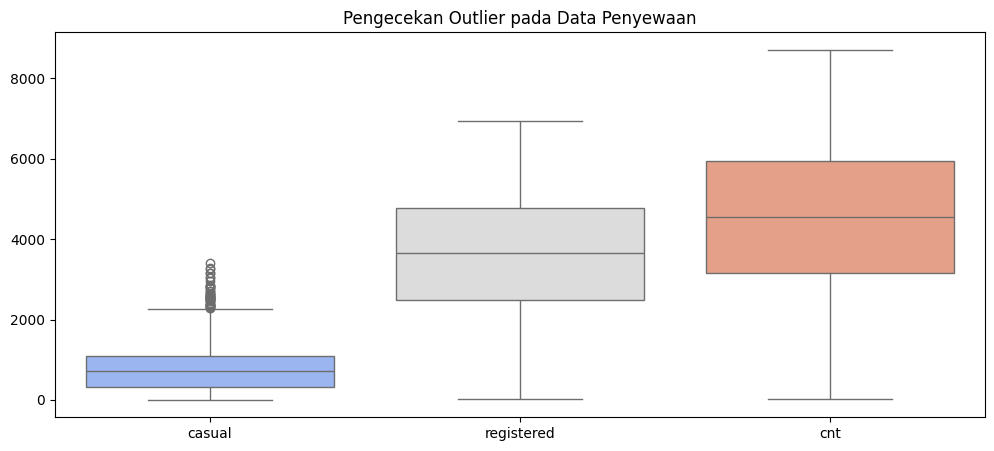

In [24]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=day_df[['casual', 'registered', 'cnt']], palette="coolwarm")
plt.title("Pengecekan Outlier pada Data Penyewaan")
plt.show()

In [25]:
# Menghitung IQR untuk 'casual'
Q1 = day_df['casual'].quantile(0.25)
Q3 = day_df['casual'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menampilkan batasan outlier
print(f"Batas bawah: {lower_bound}, Batas atas: {upper_bound}")

# Menampilkan jumlah outlier
outliers = day_df[(day_df['casual'] < lower_bound) | (day_df['casual'] > upper_bound)]
print(f"Jumlah outlier: {outliers.shape[0]}")

Batas bawah: -855.25, Batas atas: 2266.75
Jumlah outlier: 44


In [26]:
# Menghapus outlier di atas batas atas
day_df = day_df[day_df['casual'] <= upper_bound]

In [27]:
# Cek jumlah data setelah menghapus outlier
print(f"Jumlah data setelah menghapus outlier: {day_df.shape[0]}")

Jumlah data setelah menghapus outlier: 687


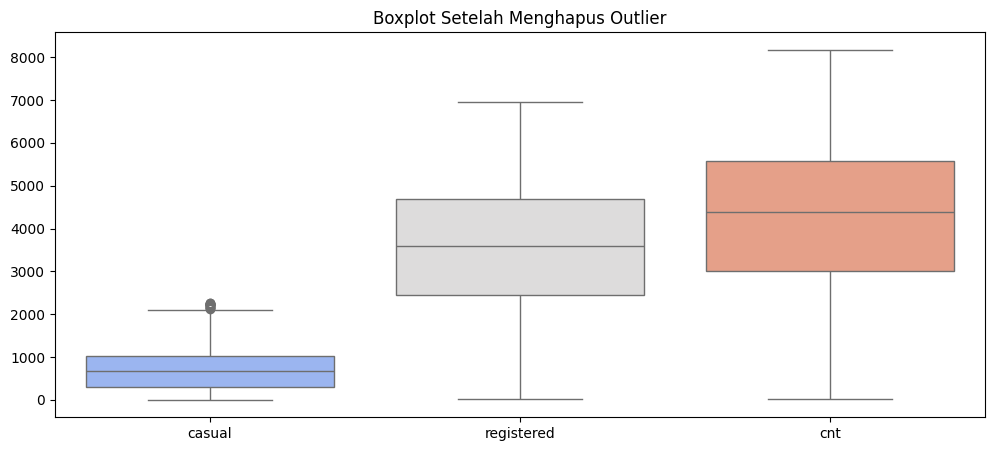

In [28]:
# Cek kembali boxplot setelah penghapusan outlier
plt.figure(figsize=(12, 5))
sns.boxplot(data=day_df[['casual', 'registered', 'cnt']], palette="coolwarm")
plt.title("Boxplot Setelah Menghapus Outlier")
plt.show()

**Insight:**
- Menghapus Kolom yang Tidak Relevan
- Normalisasi Data dan Menangani Outlier

## Exploratory Data Analysis (EDA)

### Melihat Distribusi Variabel

In [29]:
print(day_df[['cnt', 'casual', 'registered', 'temp', 'hum']].describe())


               cnt       casual   registered        temp         hum
count   687.000000   687.000000   687.000000  687.000000  687.000000
mean   4340.767103   732.010189  3608.756914    0.487475   62.891699
std    1866.258997   521.433756  1580.356697    0.184392   14.385371
min      22.000000     2.000000    20.000000    0.059130    0.000000
25%    3002.000000   295.000000  2452.500000    0.327917   52.000000
50%    4381.000000   674.000000  3603.000000    0.475833   62.666700
75%    5583.500000  1026.500000  4686.000000    0.650416   73.333350
max    8173.000000  2258.000000  6946.000000    0.861667   97.250000


### Korelasi Antar Variabel

In [30]:
correlation = day_df[['cnt', 'casual', 'registered', 'temp', 'hum', 'windspeed']].corr()
print(correlation)

                 cnt    casual  registered      temp       hum  windspeed
cnt         1.000000  0.646002    0.967764  0.630086 -0.086684  -0.246210
casual      0.646002  1.000000    0.432923  0.598537 -0.069769  -0.201762
registered  0.967764  0.432923    1.000000  0.546590 -0.079346  -0.224182
temp        0.630086  0.598537    0.546590  1.000000  0.134474  -0.155860
hum        -0.086684 -0.069769   -0.079346  0.134474  1.000000  -0.252595
windspeed  -0.246210 -0.201762   -0.224182 -0.155860 -0.252595   1.000000


### Menghitung Distribusi Penyewaan Berdasarkan Kategori (Casual vs Registered, Hari Kerja vs Libur)

In [31]:
print(day_df.groupby('workingday')['cnt'].mean())  # Rata-rata penyewaan berdasarkan hari kerja dan libur
print(day_df.groupby('season')['cnt'].mean())  # Rata-rata penyewaan berdasarkan musim
print(day_df.groupby('weathersit')['cnt'].mean())  # Rata-rata penyewaan berdasarkan cuaca

workingday
0    3713.079787
1    4577.250501
Name: cnt, dtype: float64
season
Fall      5531.790698
Spring    2575.066667
Summer    4745.402439
Winter    4613.339181
Name: cnt, dtype: float64
weathersit
Clear              4704.431555
Cloudy             3900.544681
Light Rain/Snow    1803.285714
Name: cnt, dtype: float64


**Insight:**

Distribusi Penyewaan :
- Pengguna registered memiliki jumlah penyewaan yang lebih tinggi dan lebih stabil dibandingkan dengan pengguna casual, yang lebih fluktuatif

Korelasi Antar Variabel:
- cnt sangat berkorelasi dengan casual dan registered, menunjukkan keduanya berperan besar dalam jumlah total penyewaan
- Suhu (temp) berhubungan positif dengan penyewaan sepeda, sementara kelembaban (hum) menunjukkan korelasi negatif, yang berarti semakin tinggi kelembaban, semakin rendah penyewaan sepeda.
- Kecepatan angin (windspeed) memiliki korelasi rendah terhadap jumlah penyewaan sepeda.


Penyewaan Berdasarkan Kategori:

- Penyewaan lebih banyak terjadi pada hari kerja (working day) dibandingkan hari libur (holiday), yang menunjukkan bahwa sepeda lebih banyak digunakan untuk keperluan transportasi.
- Penyewaan lebih tinggi pada musim semi dan gugur, sedangkan musim panas dan musim dingin menunjukkan penyewaan yang lebih rendah.
- Cuaca cerah berhubungan langsung dengan peningkatan jumlah penyewaan sepeda, sementara cuaca berawan dan hujan cenderung mengurangi minat untuk menyewa sepeda.

## Visualization & Explanatory Analysis

---



### Pertanyaan 1: Bagaimana Perbedaan Pola Penyewaan Sepeda antara Pengguna Casual dan Registered?

#### Boxplot Penyewaan Casual vs. Registered

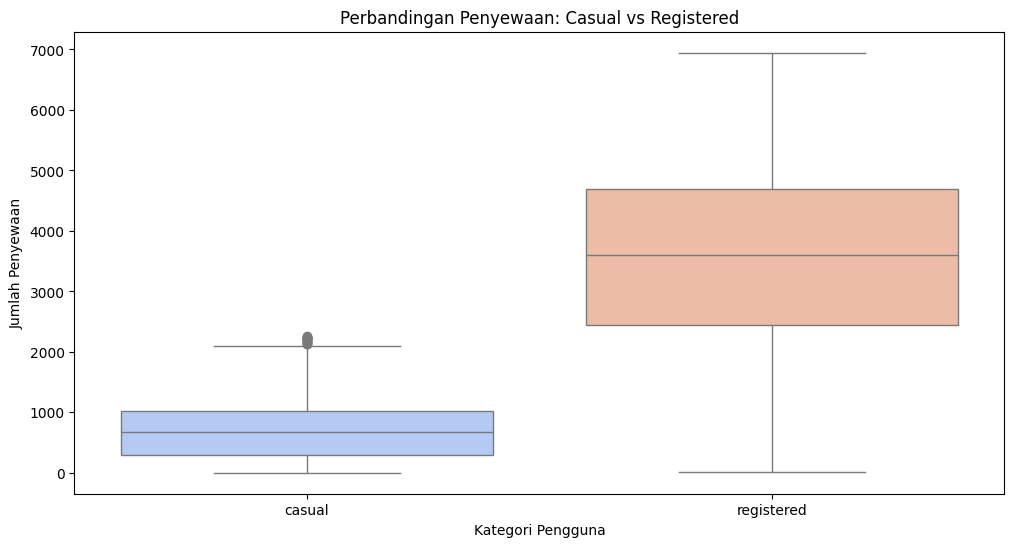

In [32]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=day_df[['casual', 'registered']], palette='coolwarm')
plt.title("Perbandingan Penyewaan: Casual vs Registered")
plt.xlabel("Kategori Pengguna")
plt.ylabel("Jumlah Penyewaan")
plt.show()

### Pertanyaan 2: Bagaimana Dampak Hari Kerja dan Libur Terhadap Penyewaan Sepeda?

#### Boxplot Penyewaan Berdasarkan Hari Kerja dan Libur

<ipython-input-39-4200252cce95>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=day_df, x='workingday', y='cnt', palette='coolwarm')


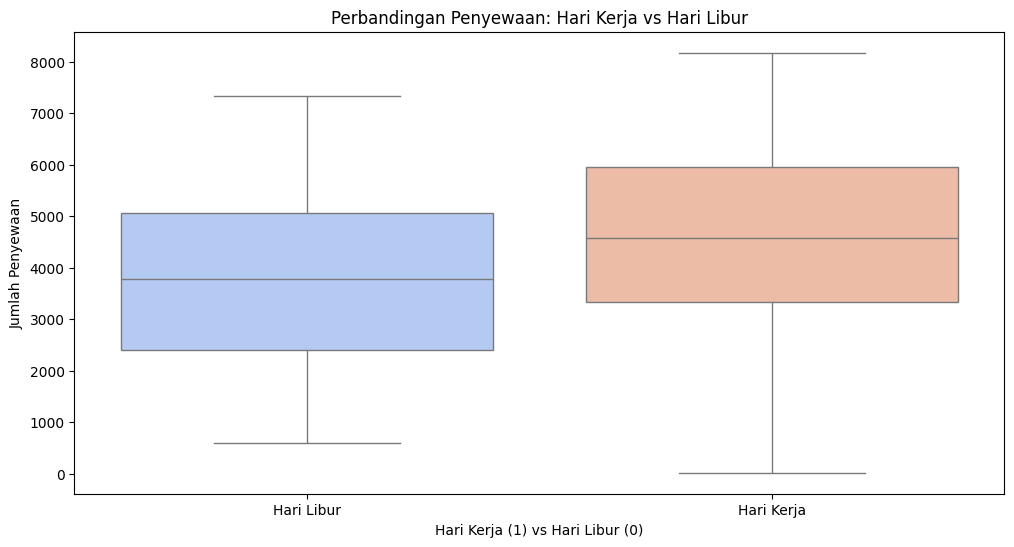

In [39]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=day_df, x='workingday', y='cnt', palette='coolwarm')
plt.title("Perbandingan Penyewaan: Hari Kerja vs Hari Libur")
plt.xlabel("Hari Kerja (1) vs Hari Libur (0)")
plt.ylabel("Jumlah Penyewaan")
plt.xticks([0, 1], ['Hari Libur', 'Hari Kerja'])
plt.show()

#### Tren Penyewaan per Bulan untuk Hari Kerja vs. Hari Libur

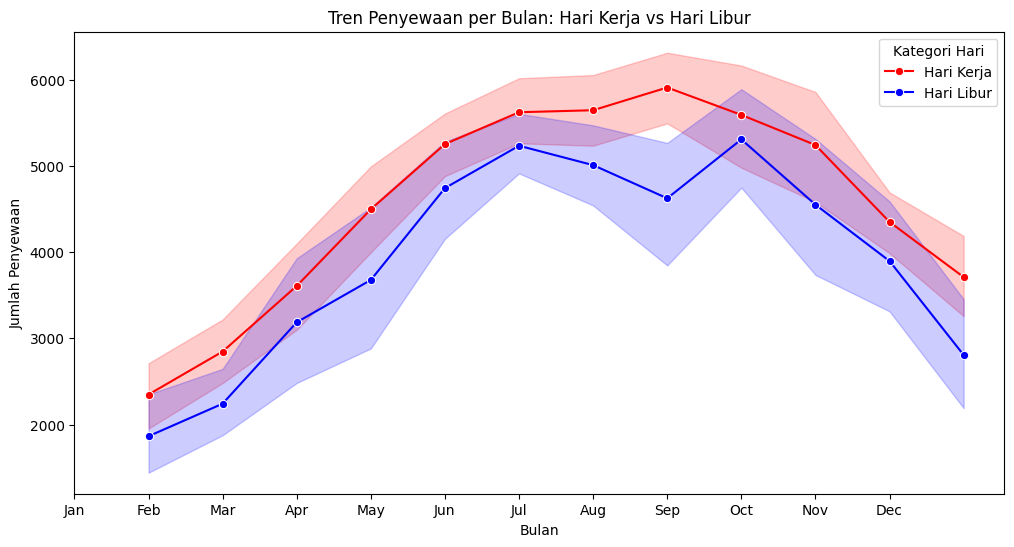

In [40]:
plt.figure(figsize=(12, 6))

# Plot untuk Hari Kerja
sns.lineplot(data=day_df[day_df['workingday'] == 1], x='mnth', y='cnt', label='Hari Kerja', color='red', marker='o')

# Plot untuk Hari Libur
sns.lineplot(data=day_df[day_df['workingday'] == 0], x='mnth', y='cnt', label='Hari Libur', color='blue', marker='o')

plt.title("Tren Penyewaan per Bulan: Hari Kerja vs Hari Libur")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Penyewaan")
plt.xticks(ticks=range(12), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.legend(title="Kategori Hari")
plt.show()

**Insight:**
- Pengguna registered cenderung memiliki jumlah penyewaan yang lebih stabil dan lebih tinggi dibandingkan dengan pengguna casual yang memiliki variasi lebih besar
- Hari kerja memiliki rata-rata penyewaan yang lebih tinggi dibandingkan dengan hari libur, yang menunjukkan bahwa sepeda lebih banyak digunakan untuk keperluan rutin seperti pergi bekerja
- Penyewaan sepeda lebih tinggi pada hari kerja selama bulan-bulan tertentu (misalnya musim semi dan gugur), sementara hari libur menunjukkan fluktuasi yang lebih besar

## Analisis Lanjutan (Opsional)

### Clustering dengan Metode Manual Grouping


Penyewaan berdasarkan kategori suhu

In [35]:
# Menentukan kriteria untuk pengelompokan manual berdasarkan jumlah penyewaan ('cnt')
bins = [0, 2000, 5000, 8000]  # Rentang jumlah penyewaan
labels = ['Rendah', 'Sedang', 'Tinggi']
day_df['pengelompokan'] = pd.cut(day_df['cnt'], bins=bins, labels=labels)

In [36]:
# Menampilkan Hasil
print(day_df[['cnt', 'pengelompokan']].head())

    cnt pengelompokan
0   985        Rendah
1   801        Rendah
2  1349        Rendah
3  1562        Rendah
4  1600        Rendah


#### Visualisasi

<ipython-input-37-5e36e649f4e5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=day_df, x='pengelompokan', palette='coolwarm')


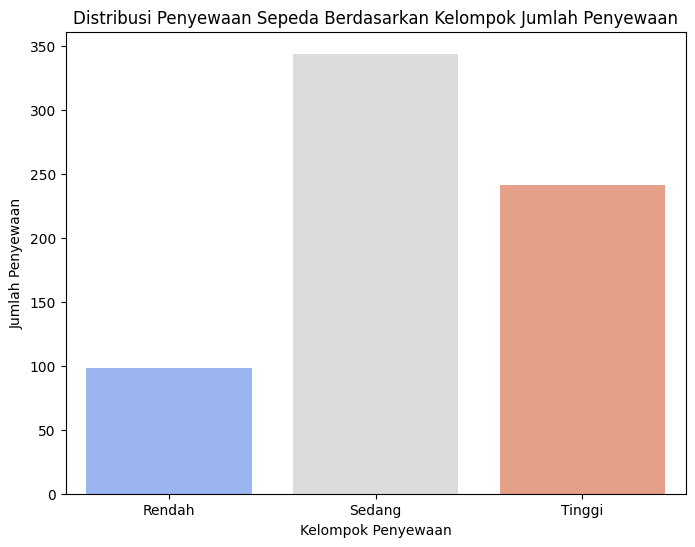

In [37]:
plt.figure(figsize=(8, 6))
sns.countplot(data=day_df, x='pengelompokan', palette='coolwarm')
plt.title("Distribusi Penyewaan Sepeda Berdasarkan Kelompok Jumlah Penyewaan")
plt.xlabel("Kelompok Penyewaan")
plt.ylabel("Jumlah Penyewaan")
plt.show()

**Insight**
- Kelompok "Tinggi" menunjukkan bahwa ada periode atau kondisi di mana penyewaan sepeda sangat tinggi.
- Kelompok "Rendah" menunjukkan periode dengan penyewaan yang lebih sedikit, mungkin karena cuaca buruk atau hari kerja.
- Kelompok "Sedang" menggambarkan kondisi normal atau rata-rata

## Conclusion

- Pengguna Registered cenderung memiliki jumlah penyewaan yang lebih stabil dan lebih tinggi dibandingkan dengan pengguna Casual. Hal ini menunjukkan bahwa pengguna terdaftar (yang mungkin memiliki akses lebih mudah dan lebih sering menggunakan layanan sepeda) lebih aktif dalam menggunakan sepeda secara rutin.
- Hari Kerja menunjukkan jumlah penyewaan sepeda yang lebih tinggi dibandingkan dengan Hari Libur. Ini bisa disebabkan oleh penggunaan sepeda untuk kebutuhan transportasi sehari-hari, seperti pergi ke kantor atau sekolah, yang lebih banyak terjadi pada hari kerja

Eksport data

In [38]:
day_df.to_csv('processed_sepeda_dashboard.csv', index=False)